# Exploring Pandas with NYC Flights Dataset

R users will recognize this famous dataset as a favorite of Hadley Wickham, author of dplyr.  No matter, we can use it with pandas as
well.

This dataset will give us flight delay data from all flights departing from the three NYC airports (JFK, LGA, EWR) in the year 2013.



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../../data/nycflights13/flights.csv.gz')

In [3]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


Let us focus on some summary and visualizations that we can do here. Let's start out by finding the average delay by month.  We'll also do a matlibplot on it.

In [5]:
mean_delay_by_month1 = df.groupby(['month'])['arr_delay'].mean()
mean_delay_by_month1

month
1      6.129972
2      5.613019
3      5.807577
4     11.176063
5      3.521509
6     16.481330
7     16.711307
8      6.040652
9     -4.018364
10    -0.167063
11     0.461347
12    14.870355
Name: arr_delay, dtype: float64

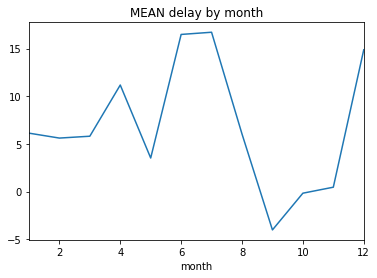

In [9]:
mean_month_plt = mean_delay_by_month1.plot(kind='line', title="MEAN delay by month")
mean_month_plt

Notice that flights in two months actually have negative delay.  No doubt airlines "pad" flight times to achieve better results.

One would guess that flights to certain airports may have different results. For example, flights to Chicago (ORD) would no doubt be affected by winter weather. Let's take a look at that.

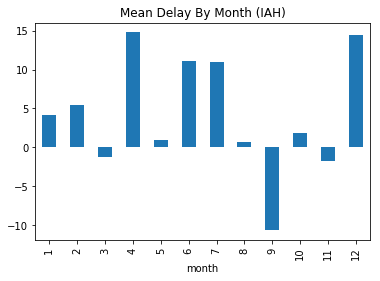

In [10]:
mean_delay_by_month_ord = df[(df.dest == 'ORD')].groupby(['month'])['arr_delay'].mean()

mean_delay_by_month_ord2 = df[(df.dest == 'IAH')].groupby(['month'])['arr_delay'].mean()

mean_month_plt_ord2 = mean_delay_by_month_ord2.plot(kind='bar', title="Mean Delay By Month (IAH)")
mean_month_plt_ord2


Flights to Los Angeles (LAX)
month
1     -4.160312
2     -7.601824
3     -5.280928
4      3.085153
5     -7.150657
6     13.007027
7      8.191432
8      1.028667
9     -8.719044
10    -1.205694
11    -0.103290
12    10.724460
Name: arr_delay, dtype: float64


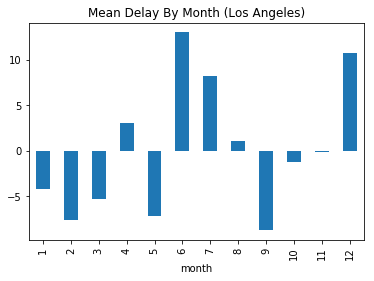

In [11]:
# Let's try Los Angeles and compare that

mean_delay_by_month_lax = df[(df.dest == 'LAX')].groupby(['month'])['arr_delay'].mean()
print("Flights to Los Angeles (LAX)")
print(mean_delay_by_month_lax)

mean_month_plt_lax = mean_delay_by_month_lax.plot(kind='bar', title="Mean Delay By Month (Los Angeles)")
mean_month_plt_lax

Perhaps we would like to see which Airline carrier is the best for delays.  Here we have some plots to do that.


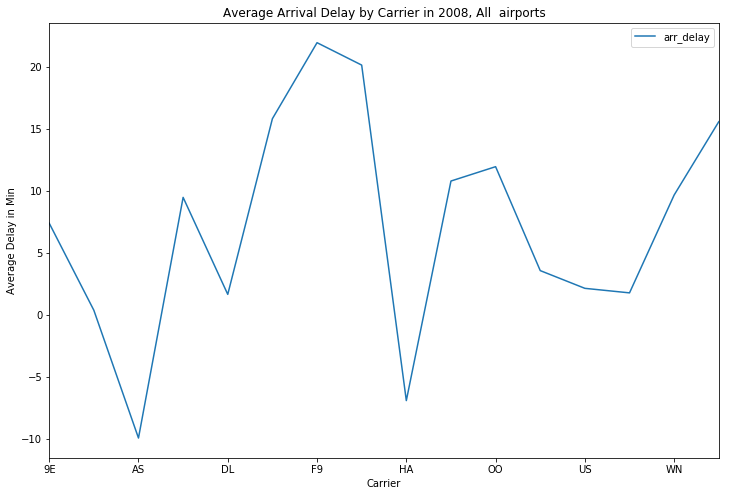

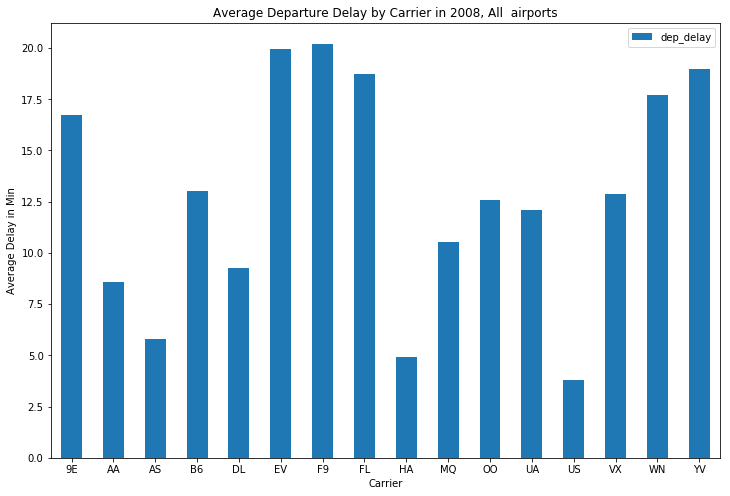

In [12]:
# Examine if specific carrier will create different delay impact
df[['carrier','arr_delay']].groupby('carrier').mean().plot(kind='line', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Arrival Delay by Carrier in 2008, All  airports')


df[['carrier','dep_delay']].groupby('carrier').mean().plot(kind='bar', figsize =(12,8))
plt.xticks(rotation=0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay in Min')
plt.title('Average Departure Delay by Carrier in 2008, All  airports')


We see that F9 (Frontier Airlines) is among the worst in terms of delays, while Hawaiian (HA) is among the best.

### Joins

We have a couple of other tables in our dataset: Weather, and airports. Let's look at these two tables and see if we can perform joins.

In [13]:
weather = pd.read_csv('../../data/nycflights13/weather.csv.gz')
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.00,1013.9,10.00,2012-12-31 19:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.00,1013.0,10.00,2012-12-31 20:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.00,1012.6,10.00,2012-12-31 21:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.00,1012.7,10.00,2012-12-31 22:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.00,1012.8,10.00,2012-12-31 23:00:00
5,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.00,1012.0,10.00,2013-01-01 01:00:00
6,EWR,2013,1,1,7,39.02,26.96,61.63,250.0,8.05546,9.270062,0.00,1012.3,10.00,2013-01-01 02:00:00
7,EWR,2013,1,1,8,39.02,28.04,64.43,240.0,11.50780,13.242946,0.00,1012.5,10.00,2013-01-01 03:00:00
8,EWR,2013,1,1,9,39.92,28.04,62.21,250.0,12.65858,14.567241,0.00,1012.2,10.00,2013-01-01 04:00:00
9,EWR,2013,1,1,10,39.02,28.04,64.43,260.0,12.65858,14.567241,0.00,1011.9,10.00,2013-01-01 05:00:00


In [10]:
df_withweather = pd.merge(df, weather, how='left', on=['year','month', 'day', 'hour'])
df_withweather

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 01:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 01:00:00
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,26.06,57.33,260.0,13.80936,15.891535,0.0,1011.9,10.0,2013-01-01 01:00:00
7,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0,2013-01-01 01:00:00
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,39.02,26.06,59.37,260.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 01:00:00


In [14]:
airports = pd.read_csv('../../data/nycflights13/airports.csv.gz')
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
5,0A9,Elizabethton Municipal Airport,36.371222,-82.173417,1593,-5,A,America/New_York
6,0G6,Williams County Airport,41.467306,-84.506778,730,-5,A,America/New_York
7,0G7,Finger Lakes Regional Airport,42.883565,-76.781232,492,-5,A,America/New_York
8,0P2,Shoestring Aviation Airfield,39.794824,-76.647191,1000,-5,U,America/New_York
9,0S9,Jefferson County Intl,48.053809,-122.810644,108,-8,A,America/Los_Angeles


In [12]:
df_withairport = pd.merge(df_withweather, airports, how='left', left_on='dest', right_on='faa')
df_withairport

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_y,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,NaN,NaN,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,NaN,NaN,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
6,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,10.0,2013-01-01 01:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
7,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,NaN,NaN,ORD,Chicago Ohare Intl,41.978603,-87.904842,668.0,-6.0,A,America/Chicago
8,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
9,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,10.0,2013-01-01 01:00:00,FLL,Fort Lauderdale Hollywood Intl,26.072583,-80.152750,9.0,-5.0,A,America/New_York
